In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('C:/Users/Sys/Downloads/FakeNewsPrediction/news'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

In [3]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Precisão de treinamento e validação
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validação', marker='o')
    plt.title('Precisão do Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Precisão')
    plt.legend()

    # Perda de treinamento e validação
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento', marker='o')
    plt.plot(history.history['val_loss'], label='Validação', marker='o')
    plt.title('Perda do Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.tight_layout()

In [6]:
# Leitura do DataFrame
df = pd.read_csv('C:/Users/Sys/Downloads/FakeNewsPrediction/news.csv')  # Substitua 'seuarquivo.csv' pelo nome do seu arquivo
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# Divisão em dados de treinamento e teste
X = df['text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Tokenização
max_words = 10000  # Número máximo de palavras a serem consideradas no vocabulário
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [9]:
# Padronização do comprimento das sequências
max_sequence_length = 1000  # Tamanho máximo da sequência
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [10]:
# Conversão dos rótulos textuais em rótulos numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
# Crie um callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a ser monitorada (no caso, perda de validação)
    patience=3,           # Número de épocas sem melhora para esperar
    verbose=1,            # Exiba mensagens detalhadas
    restore_best_weights=True  # Restaure os pesos do modelo para os melhores encontrados
)

In [12]:
# Criação do modelo de classificação usando TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=32, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Treinamento do modelo
epochs = 10
batch_size = 64

history = model.fit(X_train_padded, 
                    y_train_encoded, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test_padded, y_test_encoded), 
                    callbacks=[early_stopping])

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Epoch 1/10
80/80 [==============================] - 9s 89ms/step - loss: 0.4986 - accuracy: 0.7457 - val_loss: 0.2616 - val_accuracy: 0.9006
Epoch 2/10
80/80 [==============================] - 6s 77ms/step - loss: 0.1069 - accuracy: 0.9615 - val_loss: 0.1495 - val_accuracy: 0.9400
Epoch 3/10
80/80 [==============================] - 7s 85ms/step - loss: 0.0242 - accuracy: 0.9939 - val_loss: 0.1504 - val_accuracy: 0.9479
Epoch 4/10
80/80 [==============================] - 7s 82ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 0.1482 - val_accuracy: 0.9503
Epoch 5/10
80/80 [==============================] - 7s 81ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.1511 - val_accuracy: 0.9511
Epoch 6/10
80/80 [==============================] - 6s 80ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9487
Epoch 7/10
80/80 [==============================] - 6s 73ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1570 - val_accuracy: 0.9479
Epoch 7: earl

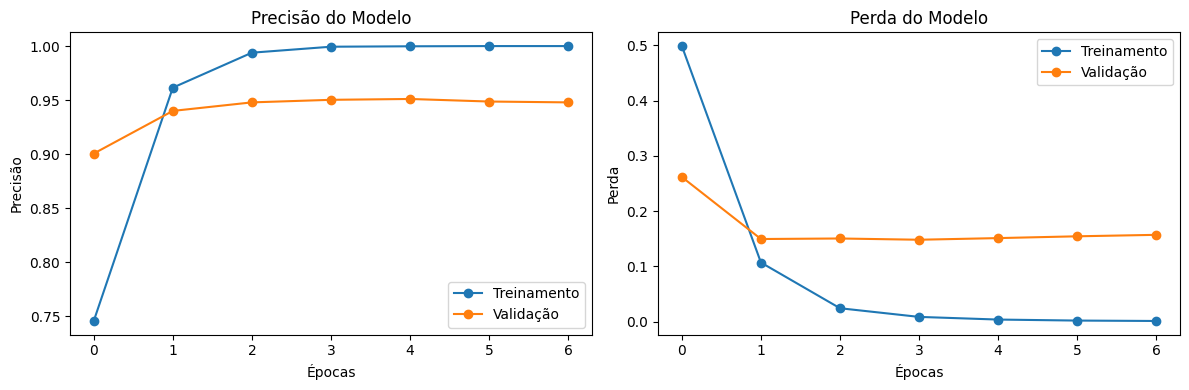

In [14]:
plot_training_history(history)

40/40 [==============================] - 1s 8ms/step


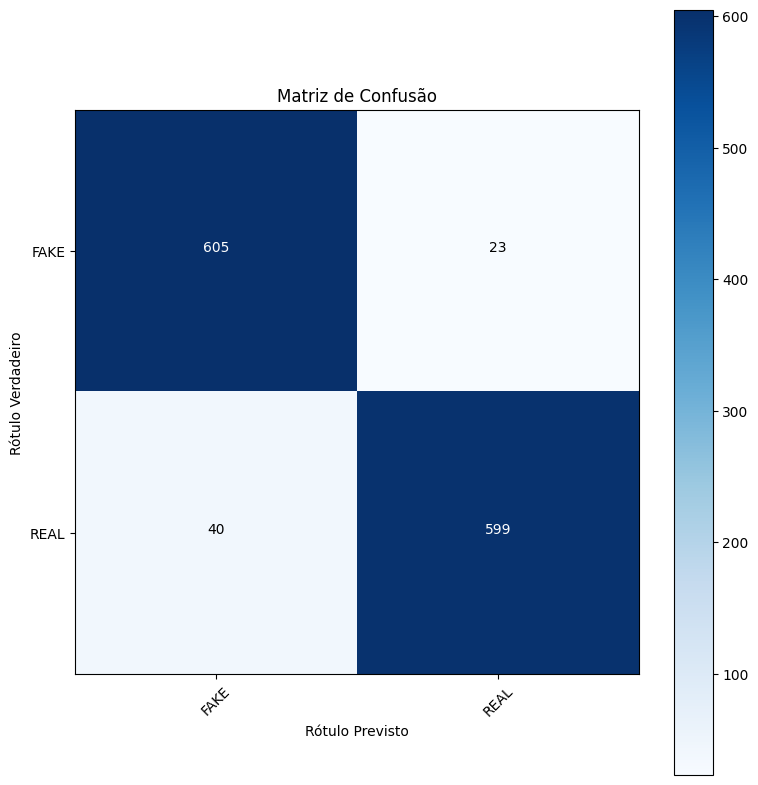

In [15]:
# Fazer previsões no conjunto de teste
threshold = 0.5
y_pred = model.predict(X_test_padded)
y_pred_classes = (y_pred > threshold).astype(int)
y_true = y_test_encoded

# Definir nomes das classes (substitua com suas próprias classes, se necessário)
class_names = ['FAKE', 'REAL']

# Plotar a matriz de confusão
plot_confusion_matrix(y_true, y_pred_classes, classes=class_names)

# Exibir a matriz de confusão
plt.show()